In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.special import factorial
import numpy as np
import matplotlib as mpl

In [2]:
mpl.rcParams["axes.grid"] = True
mpl.rcParams["axes.axisbelow"] = True
mpl.rcParams["figure.constrained_layout.use"] = True
mpl.rcParams["figure.frameon"] = False
mpl.rcParams["font.sans-serif"] = ["Lexend"] + mpl.rcParams["font.sans-serif"]
mpl.rcParams["legend.framealpha"] = 1.0
mpl.rcParams["savefig.dpi"] = 400

In [3]:
df = pd.read_csv("data/combined.csv")

In [4]:
df.head()

,Liga,Saison,Spieltag,Datum,Uhrzeit,Heim,Ergebnis,Gast
0,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,FC Schalke 04,3:1,1860 München
1,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Hannover 96,2:0,SC Freiburg
2,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Union Solingen,1:1,Wattenscheid 09
3,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Freiburger FC,2:0,Bayer 05
4,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,SpVgg Fürth,2:0,Hertha BSC


In [5]:
df["Heimtore"] = df["Ergebnis"].str.split(":").str[0].astype(int)
df["Gasttore"] = df["Ergebnis"].str.split(":").str[1].astype(int)

In [6]:
df.head()

,Liga,Saison,Spieltag,Datum,Uhrzeit,Heim,Ergebnis,Gast,Heimtore,Gasttore
0,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,FC Schalke 04,3:1,1860 München,3,1
1,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Hannover 96,2:0,SC Freiburg,2,0
2,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Union Solingen,1:1,Wattenscheid 09,1,1
3,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,Freiburger FC,2:0,Bayer 05,2,0
4,2. Bundesliga,1981,1,Sa. 01.08.1981,15:00,SpVgg Fürth,2:0,Hertha BSC,2,0


In [7]:
l_home = df["Heimtore"].mean()
l_away = df["Gasttore"].mean()

print(l_home, ":", l_away)

1.7626230692801013 : 1.1957667178514437


In [8]:
df["Ergebnis"].mode()

0    1:1
Name: Ergebnis, dtype: object

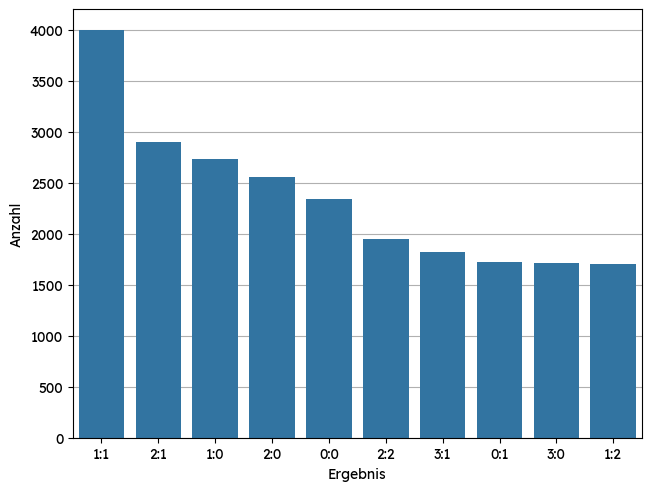

In [9]:
top_scores = df["Ergebnis"].value_counts().head(10)

sb.barplot(top_scores)

plt.ylabel("Anzahl");

In [10]:
def poisson(k, l=1.0):
    return l**k / factorial(k, exact=True) * np.exp(-l)

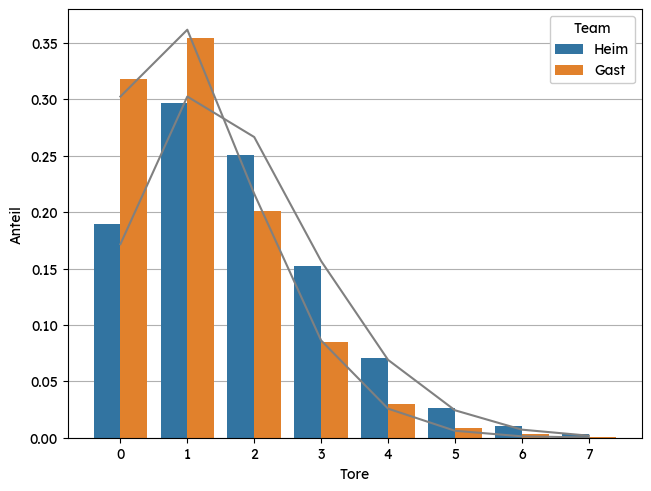

In [11]:
N = 8

home_scores = df["Heimtore"].value_counts().head(N)
home_scores = home_scores.reset_index()
home_scores.columns = ["Tore", "Anzahl"]
home_scores["Anteil"] = home_scores["Anzahl"] / home_scores["Anzahl"].sum()
home_scores["Team"] = "Heim"

away_scores = df["Gasttore"].value_counts().head(N)
away_scores = away_scores.reset_index()
away_scores.columns = ["Tore", "Anzahl"]
away_scores["Anteil"] = away_scores["Anzahl"] / away_scores["Anzahl"].sum()
away_scores["Team"] = "Gast"

scores = pd.concat((home_scores, away_scores))

sb.barplot(scores, x="Tore", y="Anteil", hue="Team")

k_list = np.arange(0, N, 1, dtype=int)
plt.plot(k_list, poisson(k_list, l_home), color="grey")
plt.plot(k_list, poisson(k_list, l_away), color="grey");

# plt.yscale("log");